<a href="https://colab.research.google.com/github/atharvapatil123/ML_Practice/blob/master/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Support Vector Regression**

Here, we don't care about those points which lie inside **Epsilon-Insensitive Tube**. It provides relaxation for them unlike Ordinary least Squares Method.

For those points outside the tube, we consider their distances from the tube.
Each of these represent vectors in 2-D space. (Outside ones support formation of the tube, so called Support Vectors)

Can work for both linear and non-linear relationships. Although, for outliers(points far away), be careful.

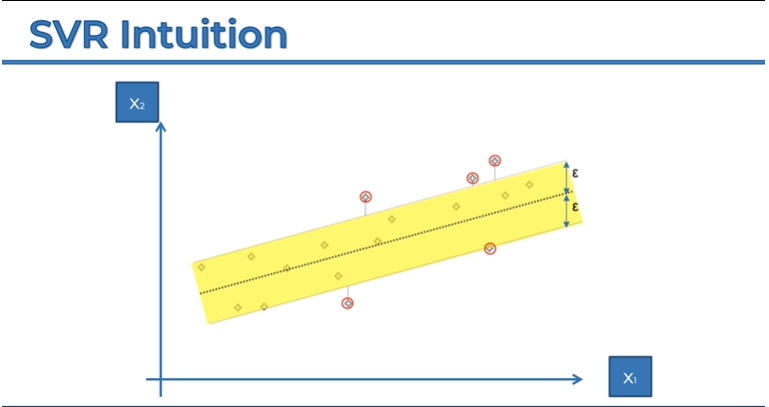

Require Feature scaling here, as we don't have any equation, where features with higher values are getting compensated by features with smaller values by their coeff.

In [ ]:
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [ ]:
dataset = pd.read_csv('Position_Salaries.csv')
x = dataset.iloc[:,1:2].values
y = dataset.iloc[:,-1].values
x


array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [ ]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


Feature Scaling

In [ ]:
# Here we apply Feature Scaling on Dependent variable y as well
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
x = sc_x.fit_transform(x)

sc_y = StandardScaler()
y = sc_y.fit_transform(y)
print(x)
print(y)



[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


Training the SVR model on the whole dataset

In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

Predicting a new result

In [ ]:
# Here, beacuse of feature scaling predicted value is in a different range, so now we must bring it to the original value
y_pred = sc_y.inverse_transform([regressor.predict([[10]])])
# print(y_pred.reshape(10,1))
print(y_pred,x)

[[252789.13920842]] [[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [ ]:
print(sc_y.inverse_transform(y))
print(y)

Visualising the SVR results

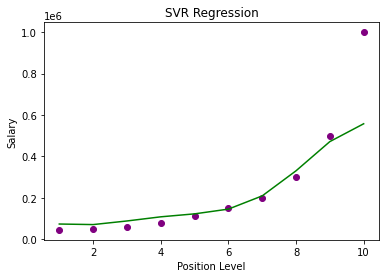

In [ ]:
# print(x, y)
plt.scatter(sc_x.inverse_transform(x), sc_y.inverse_transform(y), color="purple")
plt.plot(sc_x.inverse_transform(x), sc_y.inverse_transform([regressor.predict(x)]).reshape(10,1), color="green")
plt.title("SVR Regression")
plt.xlabel("Position Level")
plt.ylabel("Salary")
plt.show()